In [1]:
!pip install 

/Users/pb/.pyenv/versions/talkie/bin/python


In [2]:
file_to_embed = "../programming/something.md"

In [18]:
from openai import OpenAI
from dotenv import load_dotenv
import os

from pprint import pprint

In [8]:
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=openai_api_key)

In [49]:
things = ["banana", "apple", "cat", "dog", "orange", "vampire", "tiger", "juice", "blood"]

In [50]:
response = client.embeddings.create(model="text-embedding-3-small", input=things)
response_dict = response.model_dump()

In [21]:
pprint(response_dict, compact=True, depth=3)

{'data': [{'embedding': [...], 'index': 0, 'object': 'embedding'},
          {'embedding': [...], 'index': 1, 'object': 'embedding'}],
 'model': 'text-embedding-3-small',
 'object': 'list',
 'usage': {'prompt_tokens': 3, 'total_tokens': 3}}


In [22]:
len(response_dict['data'][0]['embedding'])

1536

In [24]:
from sklearn.manifold import TSNE

In [25]:
import numpy as np

In [51]:
embeddings = [x['embedding'] for x in response_dict['data']]

In [52]:
tsne = TSNE(n_components=2, perplexity=2)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

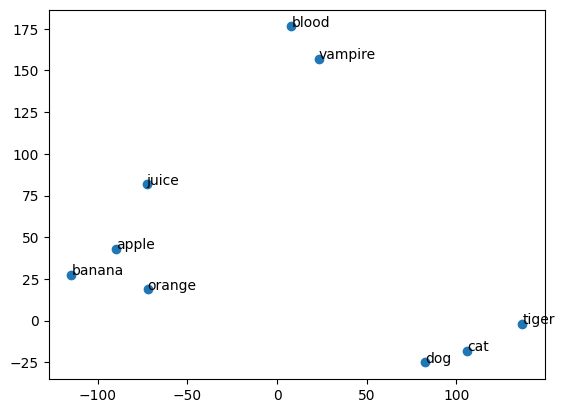

In [53]:
import matplotlib.pyplot as plt
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, topic in enumerate(things):
    plt.annotate(topic, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.show()

In [54]:
def create_embeddings(things):
    response = client.embeddings.create(model="text-embedding-3-small", input=things)
    response_dict = response.model_dump()
    embeddings = [x['embedding'] for x in response_dict['data']]
    return embeddings
    

In [76]:
from scipy.spatial import distance

search_text = "batman"
search_embedding = create_embeddings(search_text)[0]

distances = []
for single_embedding in embeddings:
    dist = distance.cosine(search_embedding, single_embedding)
    distances.append(dist)

min_dist_ind = np.argmin(distances)
print(min_dist_ind)
print(things[min_dist_ind])

5
vampire


In [77]:
def find_n_closest(query_vector, embeddings, n=3):
    distances = []
    for index, embedding in enumerate(embeddings):
        dist = distance.cosine(query_vector, embedding)
        distances.append({"distance": dist, "index": index})
    distances_sorted = sorted(distances, key=lambda x: x['distance'])
    return distances_sorted[:n]
        

In [78]:
hits = find_n_closest(search_embedding, embeddings, n=2)

for hit in hits:
    thing = things[hit['index']]
    print(thing)

vampire
tiger


In [ ]:
fruits = ['grapes', 'apple', 'orange']